In [1]:
from windisch import *
import numpy as np
import xarray as xr
import pandas as pd

In [6]:
update_input_parameters()
tip = TurbinesInputParameters()
tip.static()
_, array = fill_xarray_from_input_parameters(
    tip,
    scope={
        "year": [2020, ],
        #"size": [1000, 3000, 8000,],
        "application": [
        #    "onshore",
            "offshore"
        ],
    }
)
fp = "extra data/era5_mean_2013-2022_month_by_hour_corrected.nc"
wt = WindTurbineModel(
    array,
    #location=(55.0, 12.7),
    #wind_data=xr.open_dataset(fp),
    country="DK"
)
wt.set_all()

In [7]:
inv = Inventory(wt)

In [8]:
res = inv.calculate_impacts()

/var/folders/_s/t2tb7ghj5k77zblhgrk26qk80000gn/T/ipykernel_64099/837260595.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=1.5)


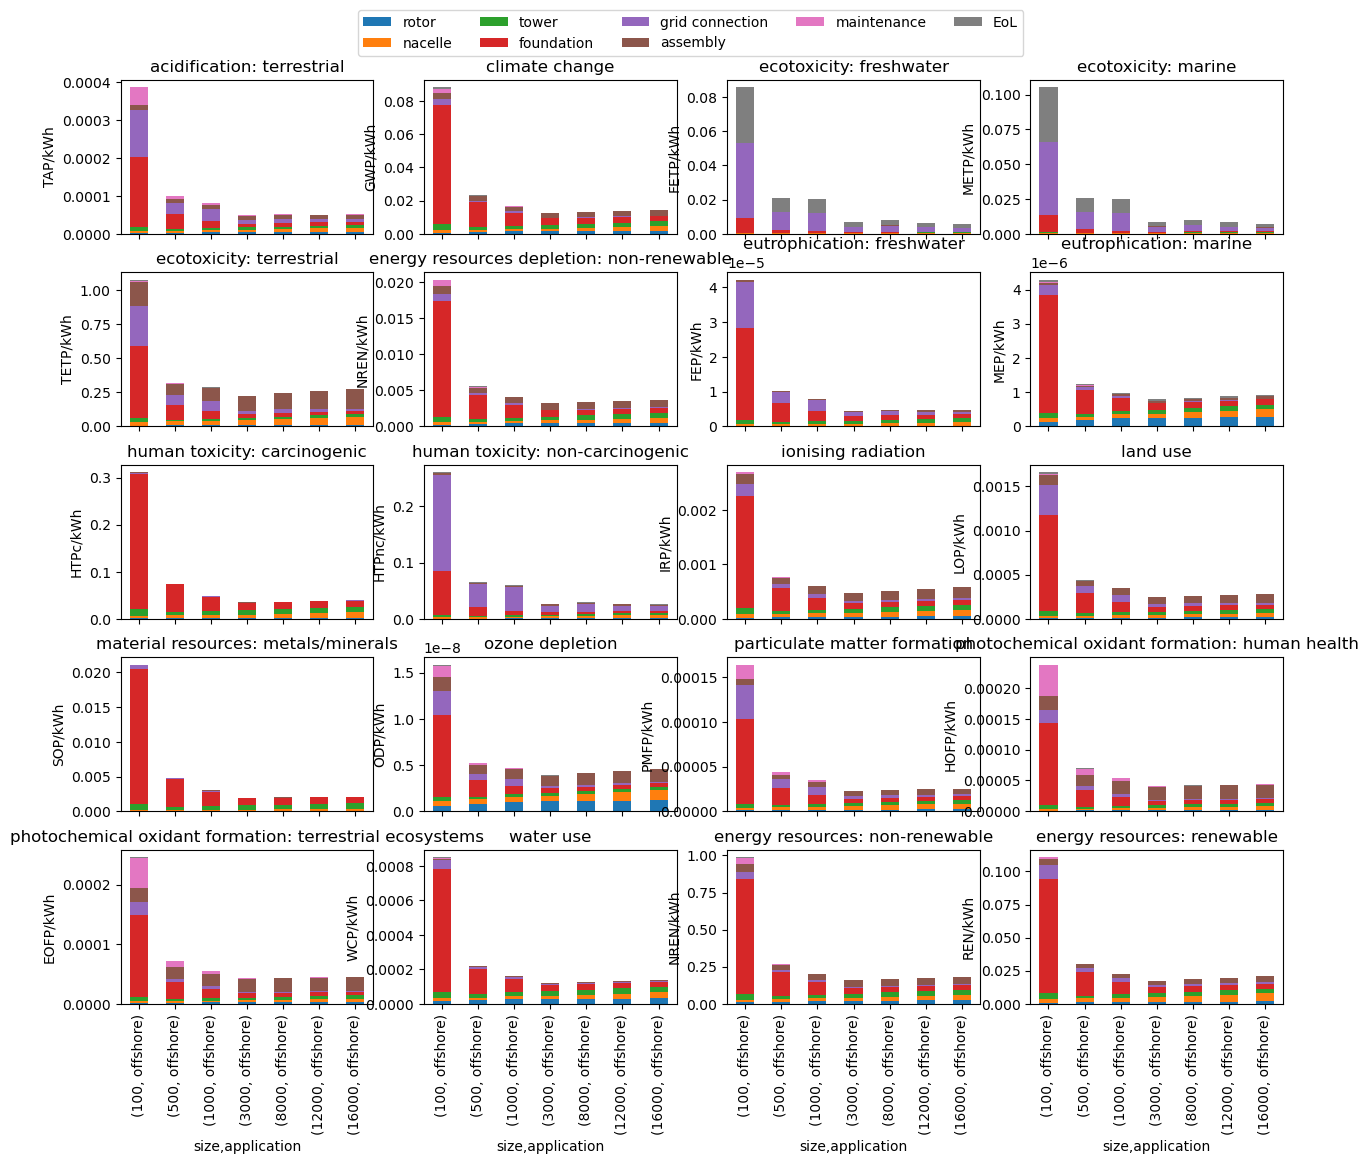

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(figsize=(15, 12),
                        sharex=True,
                        nrows=5, ncols=4,
                        gridspec_kw=dict(hspace=0.25)
                       )


targets = zip([x for x in inv.impact_categories.keys() if x != "natural land transformation"], axs.flatten())

for i, (key, ax) in enumerate(targets):
    df = res.sel(impact_category=key,
            year=2020,
            value=0).to_dataframe("val").unstack()["val"]

    df.plot(ax=ax, kind="bar", stacked=True)

    ax.set_title(key)
    ax.set_ylabel(inv.impact_categories[key]["unit"] + "/kWh")
    ax.legend().remove()

plt.legend(ncol=5, bbox_to_anchor=(0, 6.5))
plt.tight_layout(pad=1.5)
plt.show()


AttributeError: 'int' object has no attribute 'A'

In [10]:
lci = inv.export_lci()

Missing reference for tower production, for offshore wind turbine
Missing reference for treatment of tower, for onshore wind turbine
Missing reference for nacelle production, for offshore wind turbine
Missing reference for treatment of nacelle, for offshore wind turbine
Missing reference for treatment of electronic cabinet, for wind turbine
Missing reference for treatment of medium-voltage transformer, for wind turbine
Missing reference for platform production, for onshore wind turbine
Missing reference for electronic cabinet production, for wind turbine
Missing reference for treatment of nacelle, for onshore wind turbine
Missing reference for rotor production, for onshore wind turbine
Missing reference for rotor production, for offshore wind turbine
Missing reference for platform production, for offshore wind turbine
Missing reference for tower production, for onshore wind turbine
Missing reference for treatment of tower, for offshore wind turbine
Missing reference for treatment of hi

In [11]:
import bw2data
bw2data.projects.set_current("ecoinvent-3.10-cutoff")

In [12]:
lci.apply_strategies()

Applying strategy: normalize_units
Applying strategy: drop_unspecified_subcategories
Applying strategy: assign_only_product_as_production
Applying strategy: strip_biosphere_exc_locations
Applied 4 strategies in 0.00 seconds


In [13]:
lci.match_database(fields=["name", "reference product", "unit", "location"])
lci.match_database("ecoinvent-3.10.1-cutoff", fields=["name", "reference product", "unit", "location"])

Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields


In [14]:
lci.statistics()

36 datasets
312 exchanges
0 unlinked exchanges
  


(36, 312, 0)

In [16]:
if "windisch_lci_20250213_2020" in bw2data.databases:
    del bw2data.databases["windisch_lci_20250213_2020"]
lci.write_database()

Title: Writing activities to SQLite3 database:
  Started: 02/13/2025 13:53:32
  Finished: 02/13/2025 13:53:32
  Total time elapsed: 00:00:00
  CPU %: 44.60
  Memory %: 1.50
Created database: windisch_lci_20250213_2020


Brightway2 SQLiteBackend: windisch_lci_20250213_2020

In [11]:
wt["cable mass"]

<xarray.DataArray (size: 1, application: 2, year: 1, value: 1)> Size: 16B
array([[[[1.11223028e+07]],

        [[2.16740656e+02]]]])
Coordinates:
  * size         (size) int64 8B 8000
  * application  (application) <U8 64B 'offshore' 'onshore'
    parameter    <U36 144B 'cable mass'
  * year         (year) int64 8B 2020
  * value        (value) int64 8B 0